In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier , OneVsOneClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# load image data 
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [3]:
# find number of unique classes
print("number of unique classes: ", len(np.unique(y)))

number of unique classes:  10


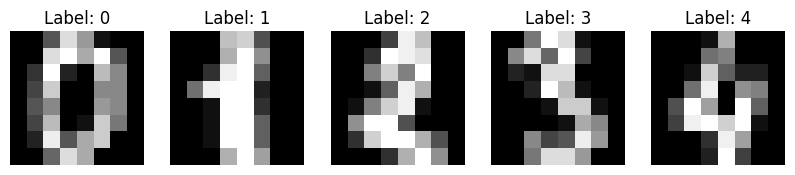

In [4]:
# how few images 
fig , axes = plt.subplots(1, 5, figsize=(10, 5))
for i , ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

In [5]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [6]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [7]:
# important for SVM to scale the data
# scale -> pixels are in range 0-16, we will scale them to 0-1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# model -> SVM One vs one classifier
svm_ovo = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42)
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)

print("Classification Report for SVM One vs One Classifier:")
print(classification_report(y_test, y_pred_ovo))
print("Accuracy for SVM One vs One Classifier:", accuracy_score(y_test, y_pred_ovo))

Classification Report for SVM One vs One Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       0.96      0.98      0.97        45
           5       0.98      0.98      0.98        46
           6       0.98      1.00      0.99        45
           7       0.96      0.98      0.97        45
           8       1.00      0.93      0.96        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy for SVM One vs One Classifier: 0.98


In [9]:
# model -> SVM with one vs rest strategy
svm_ovr = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42,decision_function_shape='ovr')
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)
print("Classification Report for SVM One vs Rest Classifier:")
print(classification_report(y_test, y_pred_ovr))
print("Accuracy for SVM One vs Rest Classifier:", accuracy_score(y_test, y_pred_ovr))

Classification Report for SVM One vs Rest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       0.96      0.98      0.97        45
           5       0.98      0.98      0.98        46
           6       0.98      1.00      0.99        45
           7       0.96      0.98      0.97        45
           8       1.00      0.93      0.96        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy for SVM One vs Rest Classifier: 0.98


In [10]:
# model C -> Explicit One vs Rest Classifier + SVM

base_svm = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42,probability=False)
ovr_explicit = OneVsRestClassifier(base_svm , n_jobs=-1)
ovr_explicit.fit(X_train, y_train)
y_pred_ovr_explicit = ovr_explicit.predict(X_test)
print("Classification Report for Explicit One vs Rest Classifier:")
print(classification_report(y_test, y_pred_ovr_explicit))
print("Accuracy for Explicit One vs Rest Classifier:", accuracy_score(y_test, y_pred_ovr_explicit))

Classification Report for Explicit One vs Rest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        46
           2       0.98      1.00      0.99        44
           3       0.98      1.00      0.99        46
           4       0.96      0.96      0.96        45
           5       0.98      0.98      0.98        46
           6       0.98      0.98      0.98        45
           7       0.94      0.98      0.96        45
           8       0.97      0.88      0.93        43
           9       0.98      0.96      0.97        45

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

Accuracy for Explicit One vs Rest Classifier: 0.9711111111111111


In [11]:
# model -> SVC with OneVsone strategy
base_svm_ovo = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42,probability=False)
ovo_explicit = OneVsOneClassifier(base_svm_ovo , n_jobs=-1)
ovo_explicit.fit(X_train, y_train)
y_pred_ovo_explicit = ovo_explicit.predict(X_test)
print("Classification Report for Explicit One vs One Classifier:")
print(classification_report(y_test, y_pred_ovo_explicit))
print("Accuracy for Explicit One vs One Classifier:", accuracy_score(y_test, y_pred_ovo_explicit))  

Classification Report for Explicit One vs One Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       0.96      0.98      0.97        45
           5       1.00      0.98      0.99        46
           6       0.98      1.00      0.99        45
           7       0.98      1.00      0.99        45
           8       0.98      0.93      0.95        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy for Explicit One vs One Classifier: 0.9822222222222222


In [12]:
# summary of results
print("Summary of Results:")
print(f"SVM One vs One Classifier Accuracy: {accuracy_score(y_test, y_pred_ovo)}")
print(f"SVM One vs Rest Classifier Accuracy: {accuracy_score(y_test, y_pred_ovr)}")
print(f"Explicit One vs Rest Classifier Accuracy: {accuracy_score(y_test, y_pred_ovr_explicit)}")
print(f"Explicit One vs One Classifier Accuracy: {accuracy_score(y_test, y_pred_ovo_explicit)}")

Summary of Results:
SVM One vs One Classifier Accuracy: 0.98
SVM One vs Rest Classifier Accuracy: 0.98
Explicit One vs Rest Classifier Accuracy: 0.9711111111111111
Explicit One vs One Classifier Accuracy: 0.9822222222222222
